In [1]:

  
import pandas as pd
import numpy as np
from sklearn import preprocessing 

from sklearn.model_selection import train_test_split



#Importing Dataset
main_df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

#Converting Severity Code from (1/2) tp (0/1)
severity_code = main_df['SEVERITYCODE'].values

labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)

main_df ["SEVERITYCODE"] = severity_code

main_df [['SEVERITYCODE']]

main_df.head()


/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,0,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,0,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,0,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,1,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
main_df.describe(include="all")
descriptive_stats= main_df.describe(include="all")




In [3]:
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


NameError: name 'plt' is not defined

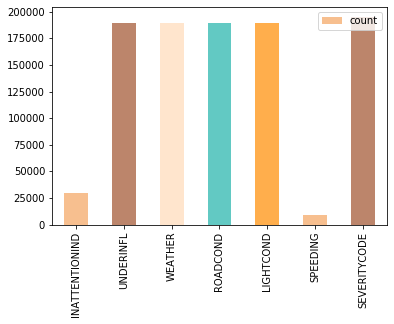

In [4]:

color_yo=['sandybrown','sienna','peachpuff','lightseagreen','darkorange']
descriptive_stats_plot.plot(kind='bar',alpha=0.70, color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()




NameError: name 'plt' is not defined

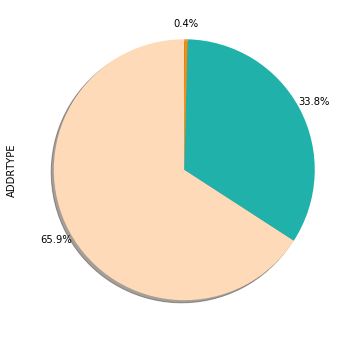

In [6]:
#Where are most accidents happening?

color_list=['peachpuff','lightseagreen','darkorange']
addtype=main_df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            )

plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [ ]:
#Encoding in attention (0 = No, 1 = Yes)
main_df["INATTENTIONIND"].replace("Y", 1, inplace=True)
main_df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#Encoding Under the influence (0 = No, 1 = Yes)
main_df["UNDERINFL"].replace("N", 0, inplace=True)
main_df["UNDERINFL"].replace("Y", 1, inplace=True)

#Encoding Speeding(0 = No, 1 = Yes)
main_df["SPEEDING"].replace("Y", 1, inplace=True)
main_df["SPEEDING"].replace(np.nan, 0, inplace=True)

#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
main_df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
main_df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
main_df["WEATHER"].replace("Clear", 0, inplace=True)
main_df["WEATHER"].replace("Raining", 3, inplace=True)
main_df["WEATHER"].replace("Overcast", 1, inplace=True)
main_df["WEATHER"].replace("Other", "Unknown", inplace=True)
main_df["WEATHER"].replace("Snowing", 3, inplace=True)
main_df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
main_df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
main_df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
main_df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
main_df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
main_df["ROADCOND"].replace("Dry", 0, inplace=True)
main_df["ROADCOND"].replace("Wet", 2, inplace=True)
main_df["ROADCOND"].replace("Ice", 2, inplace=True)
main_df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
main_df["ROADCOND"].replace("Other", "Unknown", inplace=True)
main_df["ROADCOND"].replace("Standing Water", 2, inplace=True)
main_df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
main_df["ROADCOND"].replace("Oil", 2, inplace=True)


In [ ]:

#Create a new dataframe with data points of interest
selected_columns=main_df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()



In [ ]:
#TOTAL LIGHTCOND
feature_df.head()


In [ ]:
lightcondsize = feature_df ["LIGHTCOND"].size
featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

In [ ]:
lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

In [5]:
lightcond
len(lightcond)

NameError: name 'lightcond' is not defined

In [80]:

#Light Condition Assign values
lightcond[0:9000]=0
lightcond[9000:11000]=1
lightcond[11000:12604]=2

In [81]:
lightcond


array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [82]:
feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

In [107]:
(feature_df['LIGHTCOND']).count()

184167

In [108]:
#CHANGE TO TYPE INT
feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

In [112]:
#ROAD CONDITION
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['ROADCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]


In [117]:
roadcond 
len(roadcond )

13911

In [118]:
roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:13911]=2

In [119]:
feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

In [121]:
#WEATHER CONDITION
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]
len(weather)

14611

In [122]:
weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:14611]=3

In [123]:
feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

In [124]:
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

In [125]:
#Define X and Y from feature df
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

In [140]:
from sklearn.model_selection import train_test_split
#TEST/TRAIN SPLIT OF DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


In [151]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
y=np.ravel(y)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(y_test, yhat_prob)
print(log_loss(y_test, yhat_prob))

[[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]] [[0.70272953 0.29727047]
 [0.70272953 0.29727047]
 [0.70893017 0.29106983]
 ...
 [0.64761977 0.35238023]
 [0.63387217 0.36612783]
 [0.73430212 0.26569788]]
0.6104641259548392


In [156]:
print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

Accuracy 0.695661616984308
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     38445
           1       0.29      0.00      0.00     16806

    accuracy                           0.70     55251
   macro avg       0.49      0.50      0.41     55251
weighted avg       0.57      0.70      0.57     55251

